## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm  
sns.set_style('darkgrid')
sns.set_context('talk')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

## Reading Excel Data

In [2]:
df=pd.read_excel(r"...\Complete Data for Modeling.xlsx", "UG Real Data Yr")
df = df.set_index('Date')
df.fillna(0, inplace=True)
df.head() # Show the first 5 rows in the data

,UG_course_registration,UG_AB_Tuition,Weigted_Tuition_UG,WCS,UnempRate,Weekly_Earnings
Date,,,,,,
2006-01-01,49682,557.339964,643.836367,56.546196,0.044782,987.662756
2007-01-01,58784,576.803390,667.137686,55.151957,0.042544,996.516279
2008-01-01,60295,508.728764,588.495710,97.999275,0.042045,1012.284350
2009-01-01,60833,527.213150,608.863732,57.484587,0.062514,1032.537151
2010-01-01,60323,523.276030,604.200906,77.183396,0.073419,1052.597826


## Exploring the Data

### Plotting each variable/columns in the dataset by date

UG_course_registration


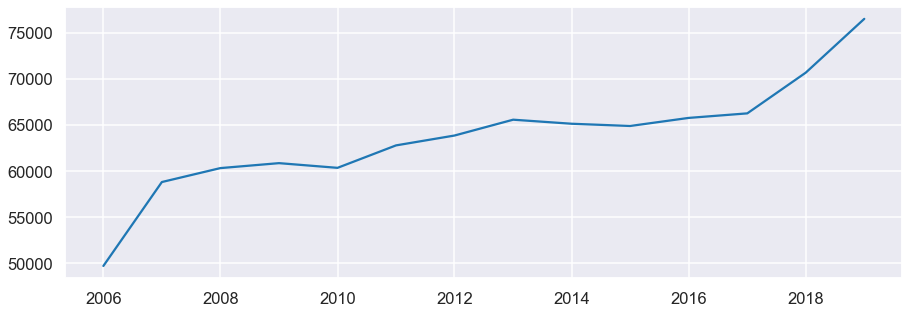

UG_AB_Tuition


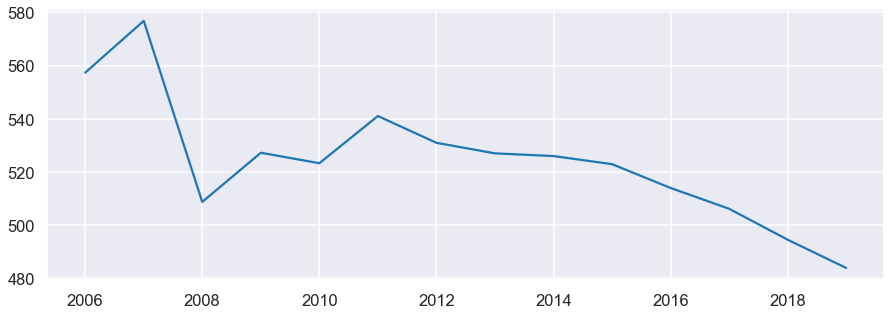

Weigted_Tuition_UG


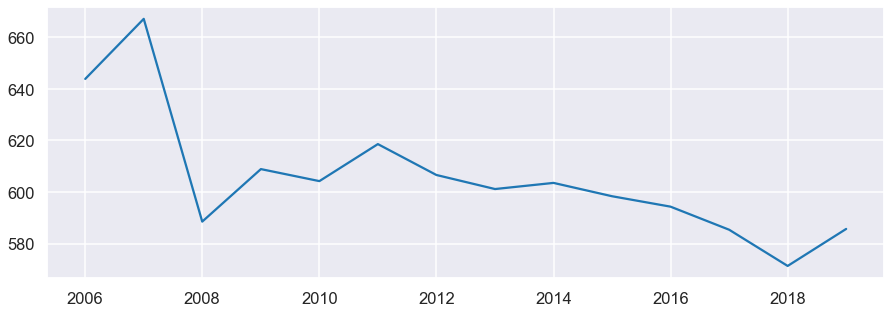

WCS


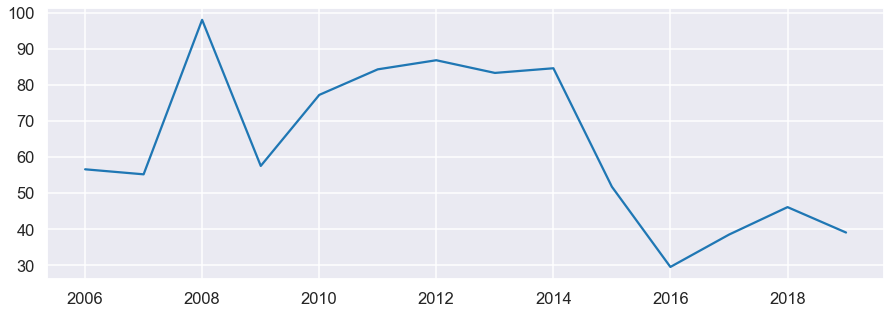

UnempRate


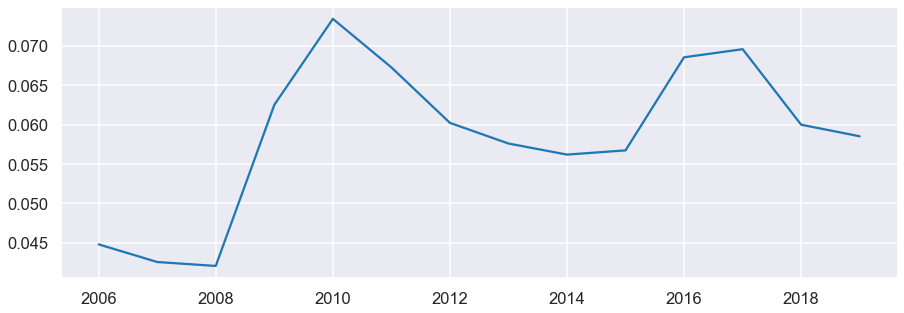

Weekly_Earnings


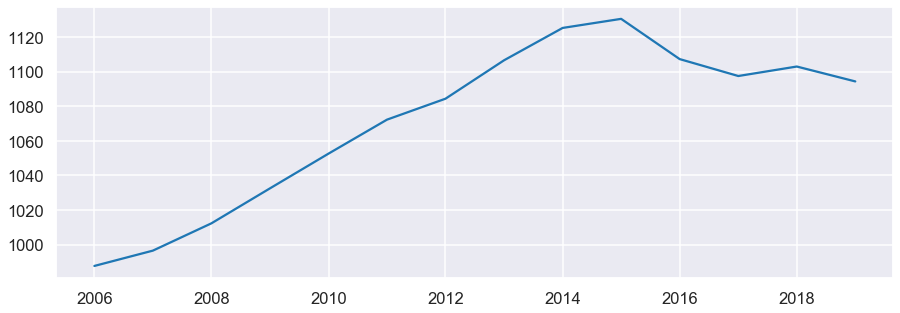

In [3]:
# This loops the plot for by columns in the data set
for c in df.columns:
    plt.figure(figsize=(15,5))
    plt.plot(df[c])
    print(c)
    plt.show()

### Checking the distribution of the variables using histograms

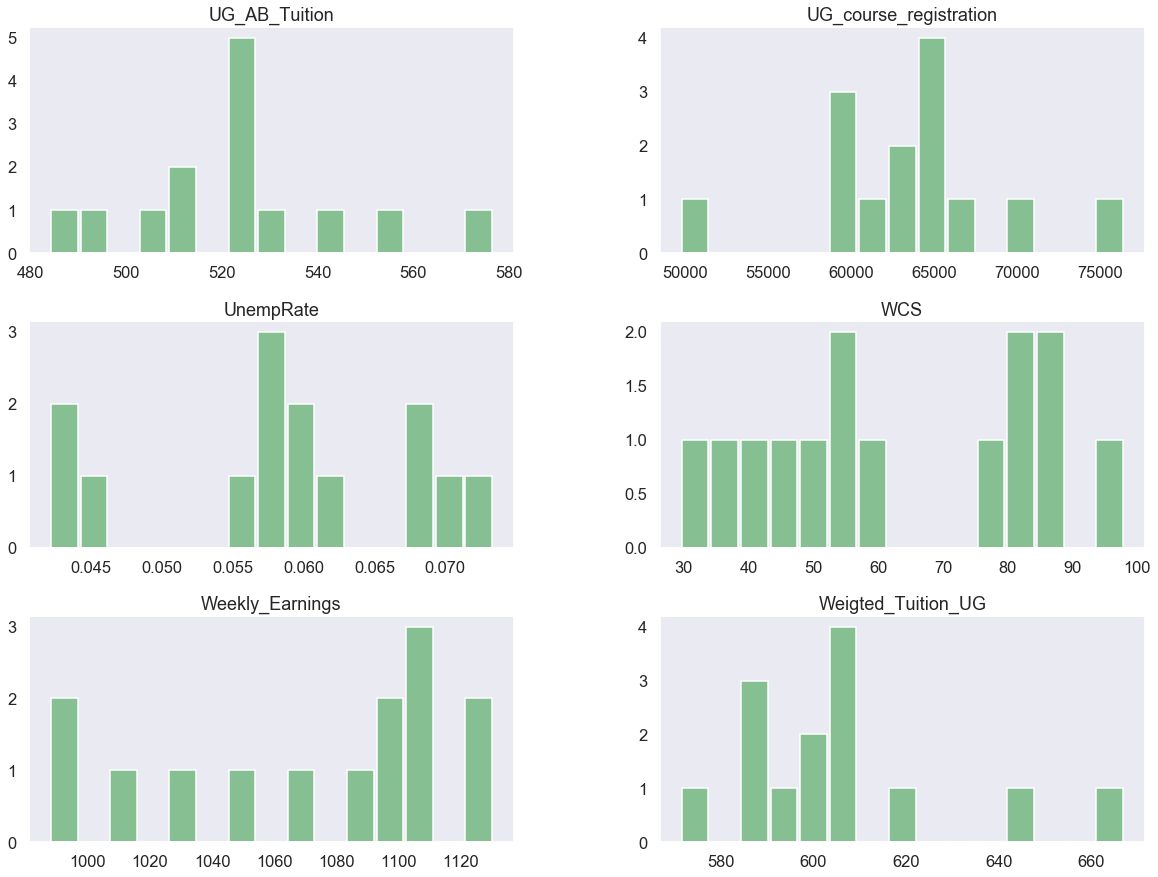

In [4]:
df.hist(bins=15, grid=False, figsize=(20,15), color='#86bf91', zorder=2, rwidth=0.9)
plt.show()

### Generating a correlation matrix for the variables

In [5]:
df.corr()

,UG_course_registration,UG_AB_Tuition,Weigted_Tuition_UG,WCS,UnempRate,Weekly_Earnings
UG_course_registration,1.000000,-0.780482,-0.709059,-0.312806,0.395220,0.740412
UG_AB_Tuition,-0.780482,1.000000,0.954711,0.249504,-0.403070,-0.569629
Weigted_Tuition_UG,-0.709059,0.954711,1.000000,0.116769,-0.468807,-0.660265
WCS,-0.312806,0.249504,0.116769,1.000000,-0.224643,-0.177669
UnempRate,0.395220,-0.403070,-0.468807,-0.224643,1.000000,0.548936
Weekly_Earnings,0.740412,-0.569629,-0.660265,-0.177669,0.548936,1.000000


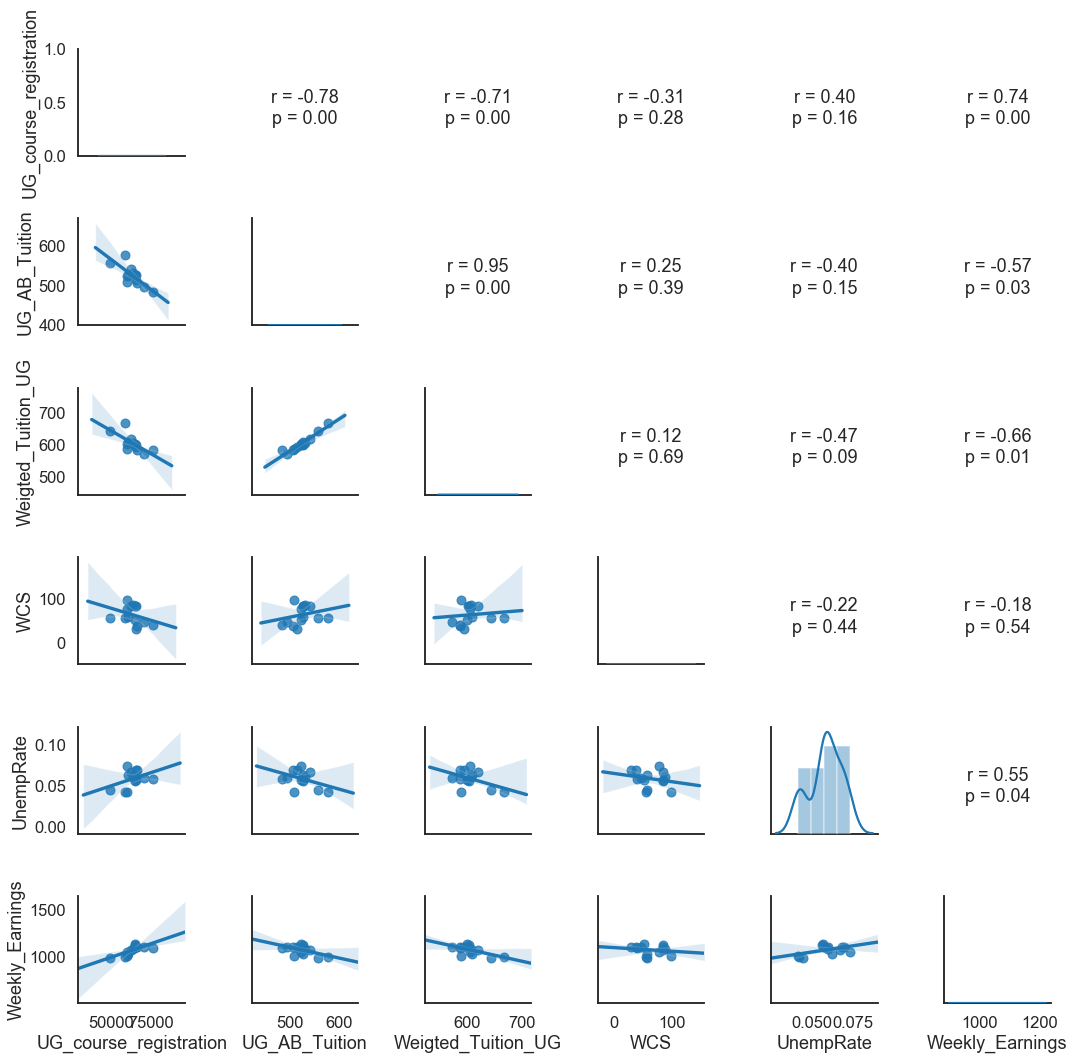

In [6]:
from scipy.stats import pearsonr
sns.set_style('white')
sns.set_context('talk')

def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.annotate('p = {:.2f}'.format(p), xy=(0.5,0.3), xycoords='axes fraction', ha='center')
    ax.set_axis_off()
    
g = sns.PairGrid(df)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

### Normalizing Data

The distribution plots of the data show that the variables are of different scales. The purpose normalizing the data is to standardize the scale for all the variables

In [7]:
from sklearn.preprocessing import MinMaxScaler

sc_in = MinMaxScaler(feature_range=(0, 1))


# Log transforamtion
df_log=np.log(df)
print("df_log")
print(df_log.tail())
print("")
print("")

# Scaling the original data to be in the range 0-1
df_scaled = pd.DataFrame(sc_in.fit_transform(df), columns=df.columns, index=df.index)
print("df_scaled")
print(df_scaled.head())
print("")
print("")
# Scaling the log transformed data to be in the range of 0-1
df_log_scaled = pd.DataFrame(sc_in.fit_transform(df_log), columns=df_log.columns, index=df_log.index)
print("df_log_scaled")
print(df_log_scaled.head())

df_log
            UG_course_registration  UG_AB_Tuition  Weigted_Tuition_UG  \
Date                                                                    
2015-01-01               11.080048       6.259445            6.394157   
2016-01-01               11.093448       6.242190            6.387379   
2017-01-01               11.100919       6.226822            6.372197   
2018-01-01               11.165522       6.203587            6.347912   
2019-01-01               11.244837       6.181886            6.372730   

                 WCS  UnempRate  Weekly_Earnings  
Date                                              
2015-01-01  3.945653  -2.869648         7.030435  
2016-01-01  3.383119  -2.680368         7.009647  
2017-01-01  3.649028  -2.665463         7.000766  
2018-01-01  3.829837  -2.813787         7.005749  
2019-01-01  3.663733  -2.838574         6.997916  


df_scaled
            UG_course_registration  UG_AB_Tuition  Weigted_Tuition_UG  \
Date                                   

### Understanding the Time Series data

#### Decomposing series into trend, seasonality and random nose and checking for stationariity using Augmented Dickey Fuller (ADF) test

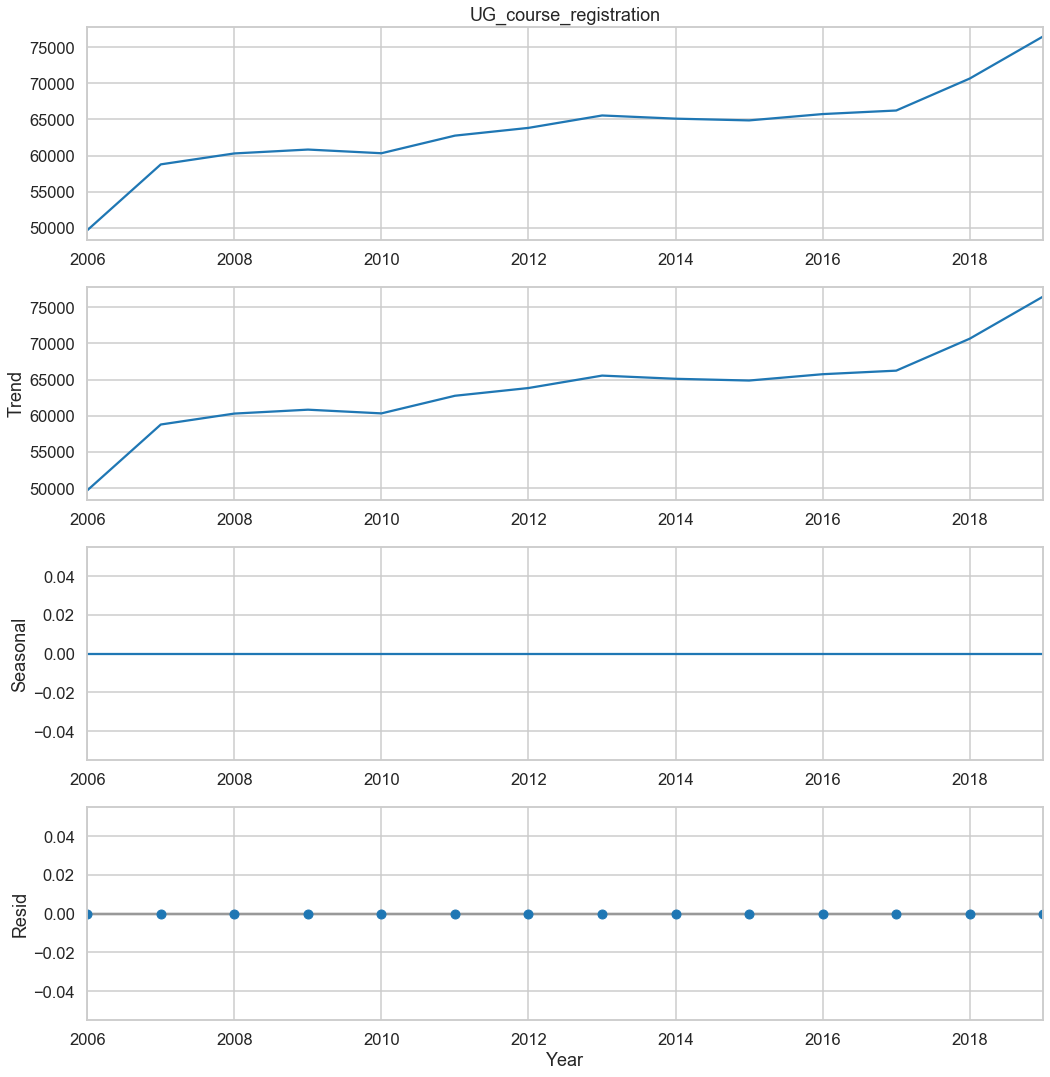

UG_course_registration - Results of Dickey-Fuller Test:
ADF Statistic: 3.233698
p-value: 1.000000
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803

UG_course_registration - Results Kwiatkowski-Phillips-Schmidt-Shin:
KPSS Statistic: 0.407386
p-value: 0.073972
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
None


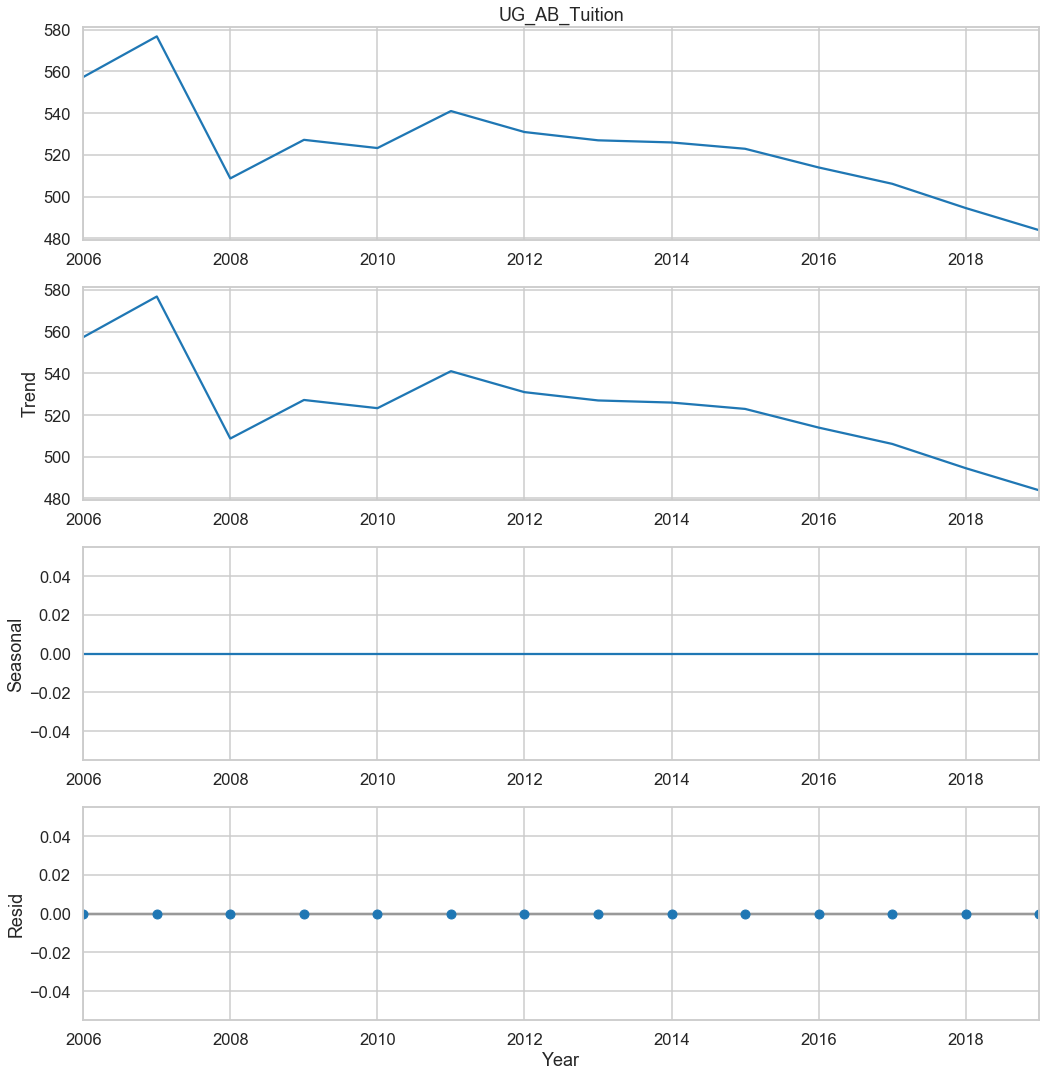

UG_AB_Tuition - Results of Dickey-Fuller Test:
ADF Statistic: 1.802493
p-value: 0.998354
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772

UG_AB_Tuition - Results Kwiatkowski-Phillips-Schmidt-Shin:
KPSS Statistic: 0.412618
p-value: 0.071716
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
None


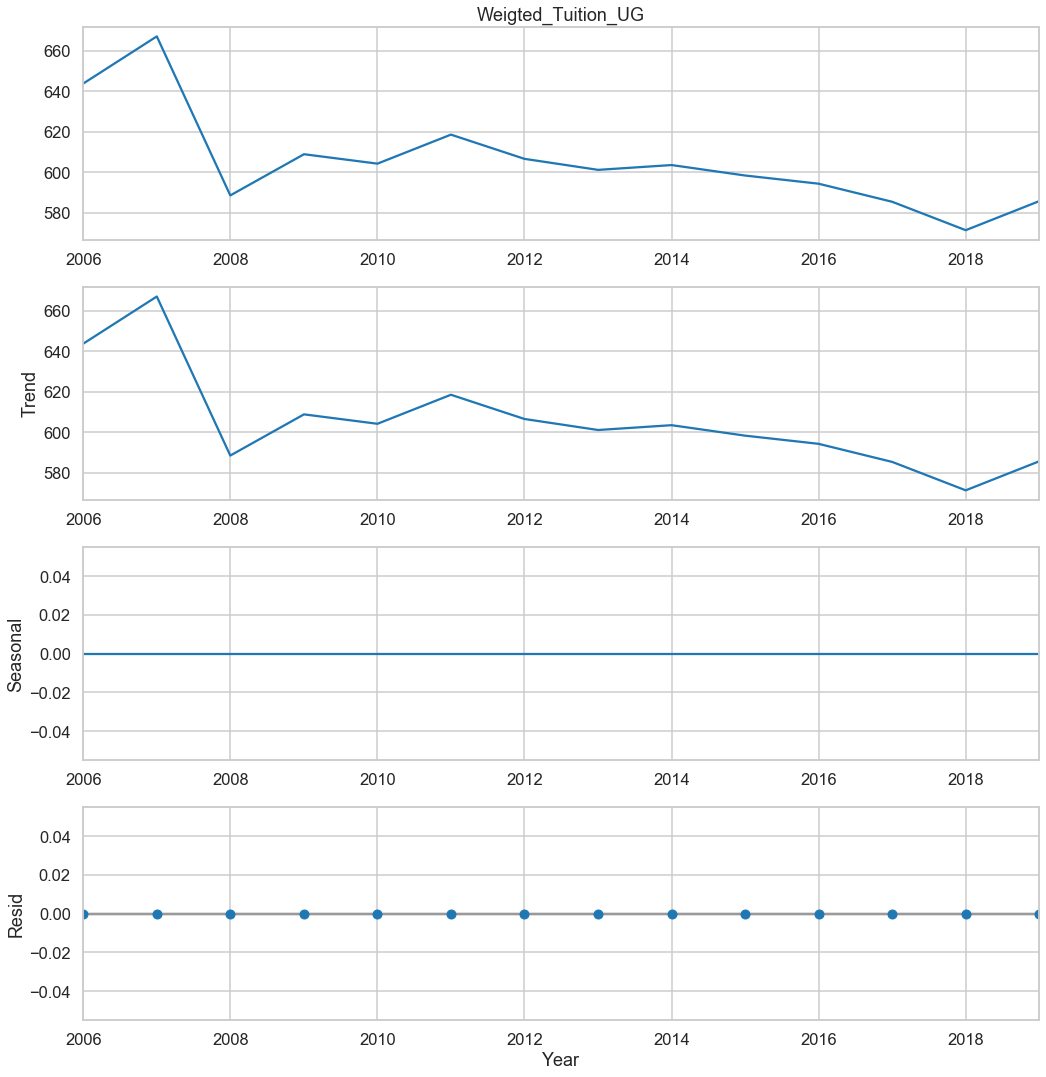

Weigted_Tuition_UG - Results of Dickey-Fuller Test:
ADF Statistic: 1.818016
p-value: 0.998384
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803

Weigted_Tuition_UG - Results Kwiatkowski-Phillips-Schmidt-Shin:
KPSS Statistic: 0.399908
p-value: 0.077195
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
None


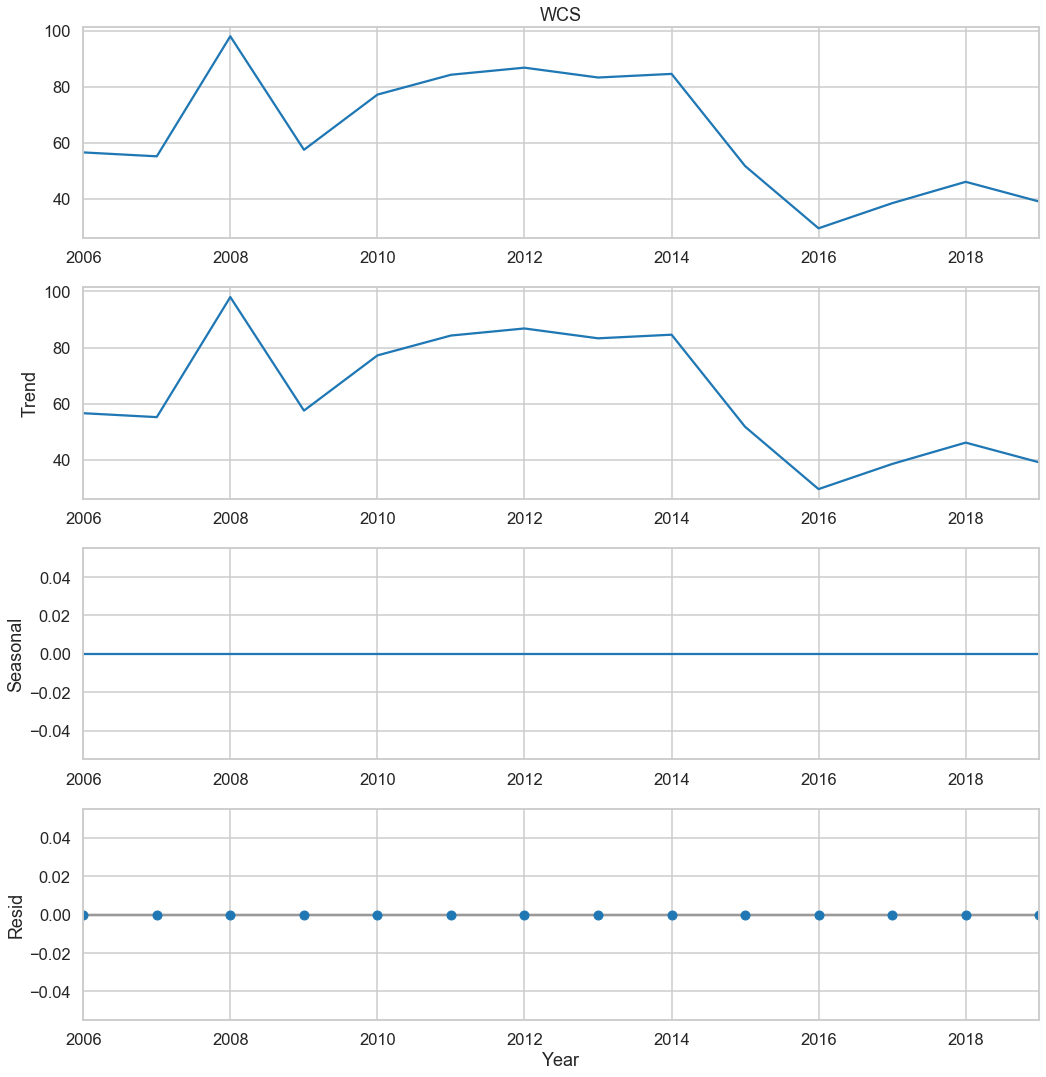

WCS - Results of Dickey-Fuller Test:
ADF Statistic: -1.689551
p-value: 0.436504
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702

WCS - Results Kwiatkowski-Phillips-Schmidt-Shin:
KPSS Statistic: 0.317610
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
None


C:\Users\inyamekye\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


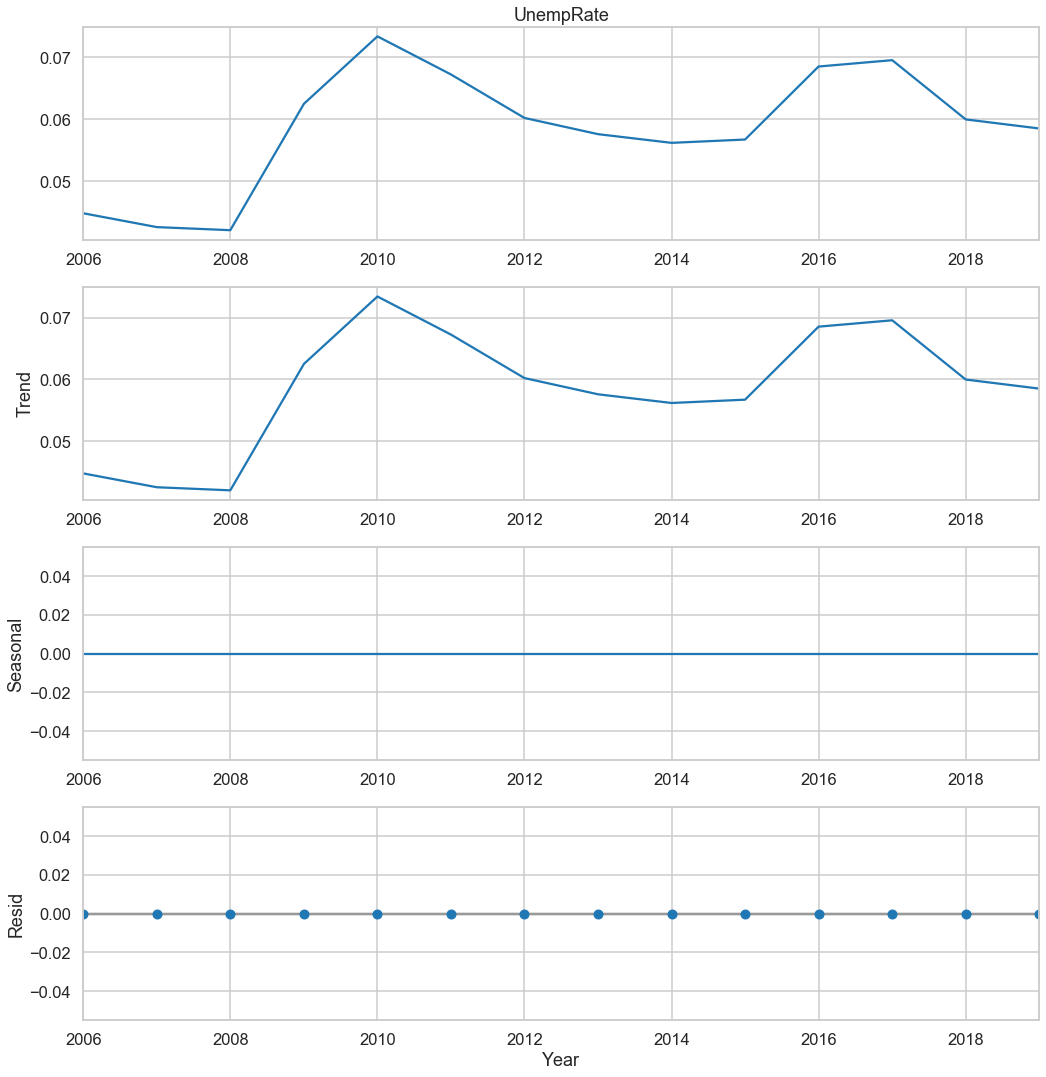

UnempRate - Results of Dickey-Fuller Test:
ADF Statistic: -1.305456
p-value: 0.626672
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803

UnempRate - Results Kwiatkowski-Phillips-Schmidt-Shin:
KPSS Statistic: 0.354874
p-value: 0.096606
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
None


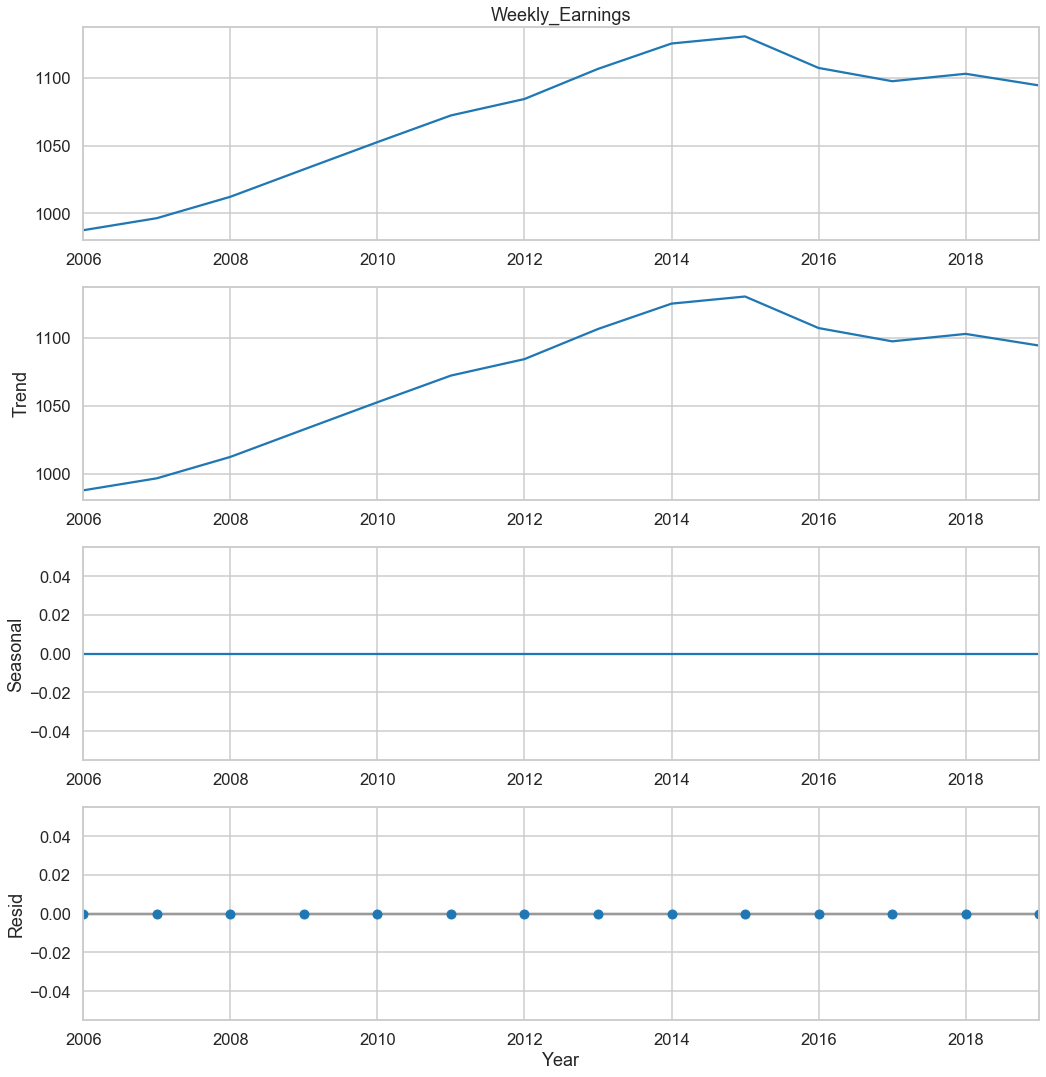

Weekly_Earnings - Results of Dickey-Fuller Test:
ADF Statistic: -3.478653
p-value: 0.008553
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803

Weekly_Earnings - Results Kwiatkowski-Phillips-Schmidt-Shin:
KPSS Statistic: 0.351131
p-value: 0.098220
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
None


In [8]:
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

sns.set_style('whitegrid')
sns.set_context('talk')

rcParams['figure.figsize'] =15, 15

def decomp(df):
    decomposition = sm.tsa.seasonal_decompose(df, 
                                              model = 'additive')  
    fig = decomposition.plot()
    plt.xlabel('Year')
    plt.show()
    
    print (f'{c} - Results of Dickey-Fuller Test:')
    dftest = adfuller(df, autolag='AIC')
    print('ADF Statistic: %f' % dftest[0])
    print('p-value: %f' % dftest[1])
    print('Critical Values:')
    for key, value in dftest[4].items():
        print('\t%s: %.3f' % (key, value))
    print("")  
    print (f'{c} - Results Kwiatkowski-Phillips-Schmidt-Shin:')
    dftest = kpss(df)
    print('KPSS Statistic: %f' % dftest[0])
    print('p-value: %f' % dftest[1])
    print('Critical Values:')
    for key, value in dftest[3].items():
        print('\t%s: %.3f' % (key, value))

for c in df.columns: 
    print(decomp(df[c]))

## Building the Model

In [9]:
# Split data into Train and Test

train_end_dt = '2018-12-31'

train_df = df.loc[:train_end_dt]
test_df = df.loc[train_end_dt:]

train_log = df_log.loc[:train_end_dt]
test_log = df_log.loc[train_end_dt:]

train_scaled = df_scaled.loc[:train_end_dt]
test_scaled = df_scaled.loc[train_end_dt:]

print("Train Log Data")
print(train_log.tail())
print("")
print("")

print("Test Log Data")
print(test_log.tail())



Train Log Data
            UG_course_registration  UG_AB_Tuition  Weigted_Tuition_UG  \
Date                                                                    
2014-01-01               11.083772       6.265242            6.402762   
2015-01-01               11.080048       6.259445            6.394157   
2016-01-01               11.093448       6.242190            6.387379   
2017-01-01               11.100919       6.226822            6.372197   
2018-01-01               11.165522       6.203587            6.347912   

                 WCS  UnempRate  Weekly_Earnings  
Date                                              
2014-01-01  4.437623  -2.879144         7.025780  
2015-01-01  3.945653  -2.869648         7.030435  
2016-01-01  3.383119  -2.680368         7.009647  
2017-01-01  3.649028  -2.665463         7.000766  
2018-01-01  3.829837  -2.813787         7.005749  


Test Log Data
            UG_course_registration  UG_AB_Tuition  Weigted_Tuition_UG  \
Date                       

### Preliminary Multiple Regression

In [11]:
import statsmodels.formula.api as smf
reg = smf.ols('UG_course_registration ~ Weigted_Tuition_UG + Weekly_Earnings', data=train_log).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     UG_course_registration   R-squared:                       0.751
Model:                                OLS   Adj. R-squared:                  0.701
Method:                     Least Squares   F-statistic:                     15.08
Date:                    Fri, 08 May 2020   Prob (F-statistic):           0.000957
Time:                            15:04:13   Log-Likelihood:                 23.178
No. Observations:                      13   AIC:                            -40.36
Df Residuals:                          10   BIC:                            -38.66
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.4504      4.981      1.496      0.166      -3.648      18.549
Weigted_Tuition_UG    -0.6789      0.439     -1.547      0.153      -1.656       0.299
Weekly_Earnings        1.1387      0.382      2.978      0.014       0.287       1.991
==============================================================================
Omnibus:                        3.657   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                1.098
Skew:                          -0.372   Prob(JB):                        0.578
Kurtosis:                       4.214   Cond. No.                     3.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

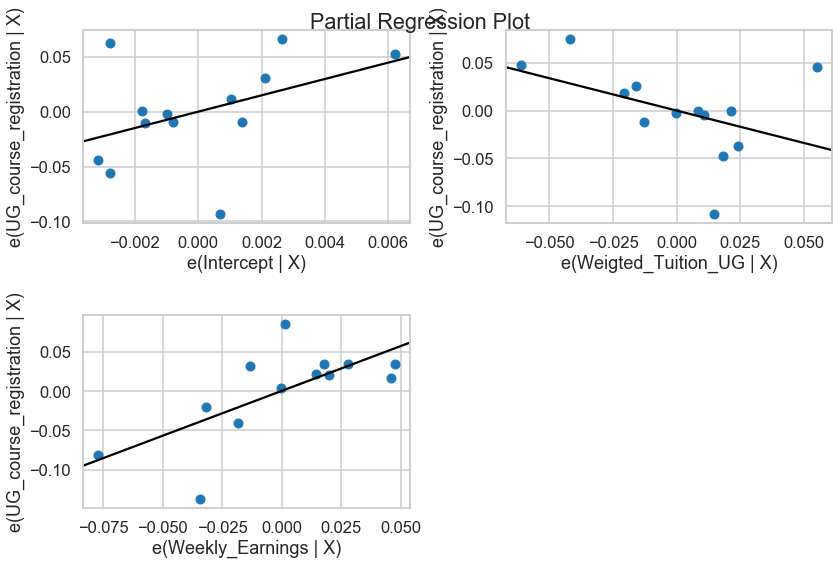

In [12]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(reg, fig=fig)

In [13]:
results = pd.DataFrame({'Actual_AUG_course_registration': train_log['UG_course_registration'],
                        'resids': reg.resid,
                        'std_resids': reg.resid_pearson,
                        'fitted': reg.predict()})

print(results.head())

            Actual_AUG_course_registration    resids  std_resids     fitted
Date                                                                       
2006-01-01                       10.813398 -0.098568   -2.124813  10.911966
2007-01-01                       10.981625  0.083631    1.802808  10.897994
2008-01-01                       11.007004  0.005987    0.129058  11.001018
2009-01-01                       11.015888  0.015410    0.332192  11.000478
2010-01-01                       11.007469 -0.020139   -0.434139  11.027608


### Determining parameter values to use in the SARIMAX model

The decomposition and ADF test of the data shows there are trend and seasonal components. Using auto_arima we are able to grid search for paramerters (p,q,d) that will take care of the trend and seasonality of our data.

In [37]:
from pmdarima.arima import auto_arima


step_wise=auto_arima(train_df['UG_course_registration'],
                     exogenous=train_df[['Weigted_Tuition_UG', 'Weekly_Earnings']],
                     start_p=1,
                     start_q=1,
                     start_d=1,
                     max_p=12,
                     max_q=12,
                     max_d=12,
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)
step_wise.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=252.900, BIC=257.419, Time=0.458 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=251.763, BIC=255.153, Time=0.038 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=253.659, BIC=257.614, Time=0.242 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=251.266, BIC=255.221, Time=0.241 seconds
Near non-invertible roots for order (0, 0, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=249.764, BIC=252.589, Time=0.123 seconds
Total fit time: 1.113 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   13
Model:                        SARIMAX   Log Likelihood                -119.882
Date:                Fri, 08 May 2020   AIC                            249.764
Time:                        15:08:31   BIC                            252.589
Sample:                    01-01-2006   HQIC                           249.183
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Weigted_Tuition_UG   -35.5952     16.125     -2.207      0.027     -67.199      -3.991
WCS                   -7.6209     59.890     -0.127      0.899    -125.004     109.762
UnempRate          -4284.7142   1.96e+05     -0.022      0.983   -3.89e+05    3.81e+05
Weekly_Earnings       79.4585     18.495      4.296      0.000      43.209     115.708
sigma2              5.989e+06   2.65e+06      2.263      0.024    8.02e+05    1.12e+07
===================================================================================
Ljung-Box (Q):                       24.13   Jarque-Bera (JB):                 0.17
Prob(Q):                              0.02   Prob(JB):                         0.92
Heteroskedasticity (H):               0.53   Skew:                            -0.28
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Using the optimum combination of the parameters to build the SARIMAX model

C:\Users\inyamekye\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\inyamekye\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept          -1639.0771   1.09e+04     -0.150      0.881   -2.31e+04    1.98e+04
drift                334.7598   1381.655      0.242      0.809   -2373.235    3042.755
Weigted_Tuition_UG   -21.8279    201.614     -0.108      0.914    -416.984     373.328
Weekly_Earnings       28.9151    103.629      0.279      0.780    -174.195     232.025
ar.L1                 -0.7683      1.812     -0.424      0.671      -4.319       2.782
ma.L1                  0.3579      3.306      0.108      0.914      -6.123       6.838
sigma2              1.936e+06   1.52e+06      1.274      0.203   -1.04e+06    4.91e+06


C:\Users\inyamekye\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ValueError: operands could not be broadcast together with shapes (9,) (8,) (9,) 

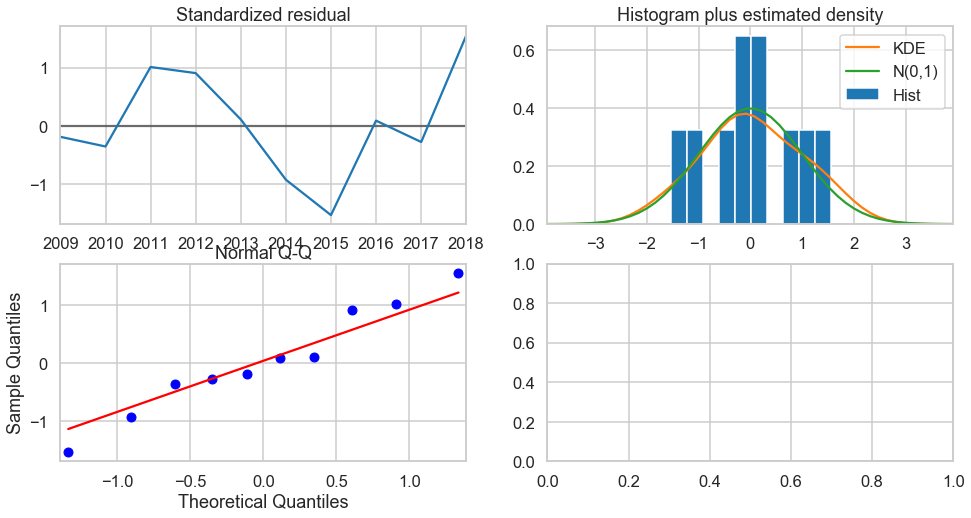

In [38]:

mod = sm.tsa.statespace.SARIMAX(train_df['UG_course_registration'],
                                exog=train_df[['Weigted_Tuition_UG', 'Weekly_Earnings']],
                                trend='ct',
                                order=(1, 1, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16, 8))
plt.show()

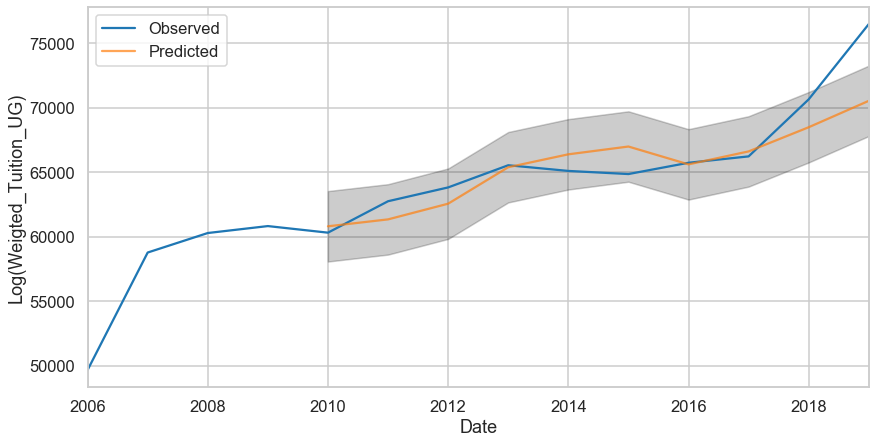

In [39]:
pred = results.get_prediction(start =pd.to_datetime('2010-01-01'), 
                                     end =pd.to_datetime('2019-01-01'),
                                     exog=test_df[['Weigted_Tuition_UG', 'Weekly_Earnings']],
                                     dynamic=False)

pred_ci = pred.conf_int()

ax = df.UG_course_registration['2005':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel("Log(Weigted_Tuition_UG)")
plt.legend()

plt.show()

In [40]:
def predict(exo):
    predictions = results.predict(start =pd.to_datetime('2019-01-01'),
                                  end = pd.to_datetime('2019-01-01'),
                                  exog = exo,
                                  dynamic=False)
    return predictions

In [41]:
predictions1 = predict(exo = test_df[['Weigted_Tuition_UG', 'Weekly_Earnings']])
predictions1 = pd.DataFrame(predictions1)
predictions1['Actual'] = df.UG_course_registration['2019-01-01':]
predictions1.rename(columns={0:'Pred'}, inplace=True)
predictions1 = predictions1[['Actual','Pred']]
predictions1.head()

,Actual,Pred
2019-01-01,76484,70537.589114


### Evaluating Model

In [42]:
from statsmodels.tools.eval_measures import rmse
error=rmse(predictions1['Pred'], predictions1['Actual'])
print("Root Mean Square Error:", error)

Root Mean Square Error: 5946.410886485712


### Sensitivity of model to changes in Tuition

In [43]:
test_df['Weigted_Tuition_UG1'] = test_df['Weigted_Tuition_UG']*1.01
test_df.head()

C:\Users\inyamekye\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,UG_course_registration,UG_AB_Tuition,Weigted_Tuition_UG,WCS,UnempRate,Weekly_Earnings,Weigted_Tuition_UG1,Weigted_Tuition_UG7
Date,,,,,,,,
2019-01-01,76484,483.903717,585.654559,39.006668,0.058509,1094.349871,591.511105,626.650378


In [44]:
predictions2 = predict(exo = test_df[['Weigted_Tuition_UG1', 'Weekly_Earnings']])
predictions2 = pd.DataFrame(predictions2)
predictions2.rename(columns={0:'Pred1'}, inplace=True)
predictions2.head()

,Pred1
2019-01-01,70409.752919


In [45]:
test_df['Weigted_Tuition_UG7'] = test_df['Weigted_Tuition_UG']*1.07
test_df.head()

C:\Users\inyamekye\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,UG_course_registration,UG_AB_Tuition,Weigted_Tuition_UG,WCS,UnempRate,Weekly_Earnings,Weigted_Tuition_UG1,Weigted_Tuition_UG7
Date,,,,,,,,
2019-01-01,76484,483.903717,585.654559,39.006668,0.058509,1094.349871,591.511105,626.650378


In [46]:
predictions7 = predict(exo = test_df[['Weigted_Tuition_UG7', 'Weekly_Earnings']])
predictions7 = pd.DataFrame(predictions7)
predictions7.rename(columns={0:'Pred7'}, inplace=True)
predictions7.head()

,Pred7
2019-01-01,69642.735752


In [47]:
predictions_wip = pd.concat([predictions1, predictions2, predictions7], axis=1, sort=True)
predictions_wip.head()

,Actual,Pred,Pred1,Pred7
2019-01-01,76484,70537.589114,70409.752919,69642.735752


### Converting predictions to original scale

In [48]:
predictions_final = predictions_wip
predictions_final.loc['Total'] = predictions_final.sum(axis=0)
predictions_final['Pred1-Pred %Change'] = (predictions_final['Pred1']/predictions_final['Pred'])-1
predictions_final['Pred7-Pred %Change'] = (predictions_final['Pred7']/predictions_final['Pred'])-1
predictions_final['Pred7/Pred1'] = predictions_final['Pred7-Pred %Change']/predictions_final['Pred1-Pred %Change']
predictions_final

,Actual,Pred,Pred1,Pred7,Pred1-Pred %Change,Pred7-Pred %Change,Pred7/Pred1
2019-01-01 00:00:00,76484.0,70537.589114,70409.752919,69642.735752,-0.001812,-0.012686,7.0
Total,76484.0,70537.589114,70409.752919,69642.735752,-0.001812,-0.012686,7.0
